1. Carga de datos

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../../data/house-prices.csv')

df.head()


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


2. Exploracion de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


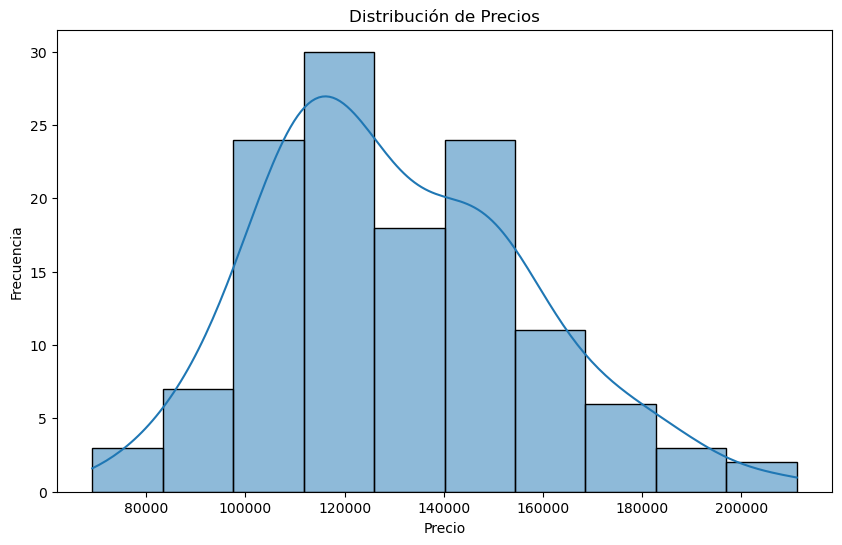

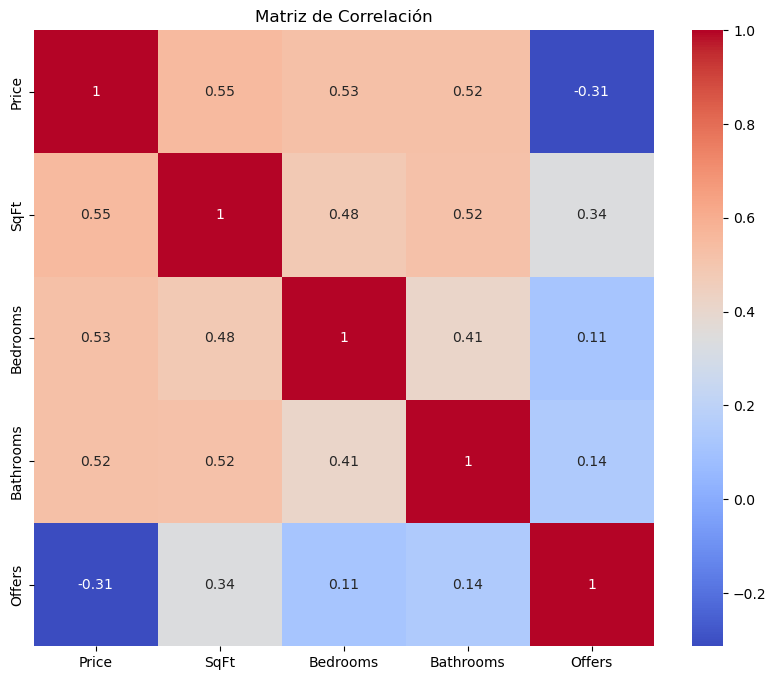

In [4]:
df.info()

# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de correlacion
numerical_cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

3. Preparacion de datos

In [5]:
# Seleccionar características para el modelo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



4. Entrenar modelo

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

5. Evaluar modelo


Resultados de la evaluación:
Error cuadrático medio (MSE): 320149938.23
R-cuadrado (R²): 0.4568


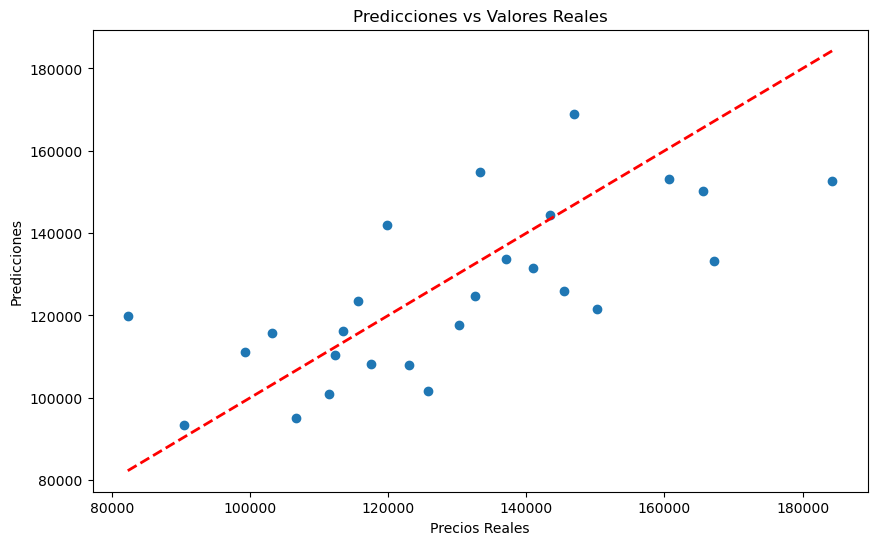

In [7]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados de la evaluación:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R-cuadrado (R²): {r2:.4f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precios Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

6. Prediccion


In [ ]:
nueva_casa = np.array([[2000, 3, 2]])
prediccion = modelo.predict(nueva_casa)
print(f"\nPredicción para la nueva casa:")
print(f"Precio estimado: ${prediccion[0]:,.2f}")

# Imprimir coeficientes del modelo
print("\nCoeficientes del modelo:")
caracteristicas = ['SqFt', 'Bedrooms', 'Bathrooms']
for feature, coef in zip(caracteristicas, modelo.coef_):
    print(f"{feature}: ${coef:,.2f}")


Predicción para la nueva casa:
Precio estimado: $123,537.00

Coeficientes del modelo:
SqFt: $41.45
Bedrooms: $10,278.01
Bathrooms: $13,090.39
Intercepto: $-16,372.92


c:\Users\Ivan\miniconda3\envs\env_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
